In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
import tools.clusterfit as cf
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')
scan_bf = pd.read_csv('../data/fits/legacy/scan_LX-T_θ75.csv')
scan_bf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Glon,Glat,A,B,TotalScatter,n_sigma
0,-180.0,-90.0,1.693134,2.494,0.090,0.000000
1,-180.0,-88.0,1.693134,2.494,0.090,-1.602715
2,-180.0,-86.0,1.693134,2.494,0.090,-1.131356
3,-180.0,-84.0,1.685355,2.492,0.090,-1.136989
4,-180.0,-82.0,1.685355,2.492,0.090,-1.246495
...,...,...,...,...,...,...
8095,176.0,80.0,1.772929,2.504,0.096,1.559067
8096,176.0,82.0,1.772929,2.502,0.096,1.732040
8097,176.0,84.0,1.764783,2.496,0.096,1.272747
8098,176.0,86.0,1.764783,2.494,0.096,1.382375


In [31]:
scan_bf['n_sigma'].idxmax(), scan_bf['n_sigma'].idxmin()

(1861, 5879)

In [32]:
scan_bf.iloc[1861], scan_bf.iloc[5879]

(Glon           -100.000000
 Glat             32.000000
 A                 1.839465
 B                 2.620000
 TotalScatter      0.090000
 n_sigma           4.935642
 Name: 1861, dtype: float64,
 Glon            80.000000
 Glat           -32.000000
 A                1.639425
 B                2.408000
 TotalScatter     0.090000
 n_sigma         -4.935642
 Name: 5879, dtype: float64)

In [5]:
samples = pd.read_csv('./data/samples-lightcone0-clean.csv')
dtheta = cf.angular_separation(samples['phi_on_lc'], samples['theta_on_lc'], -100, 32)

In [6]:
p_dipoles = samples[:313][dtheta[:313] < 75]
n_dipoles = samples[:313][dtheta[:313] > 105]

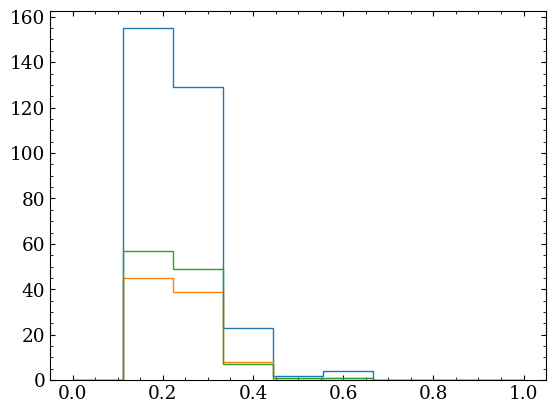

In [7]:
bins = np.linspace(0, 1, 10)
plt.hist(samples['Lcore/Ltot'][:313], bins=bins, histtype='step')
plt.hist(p_dipoles['Lcore/Ltot'], bins=bins, histtype='step')
plt.hist(n_dipoles['Lcore/Ltot'], bins=bins, histtype='step')
plt.show()

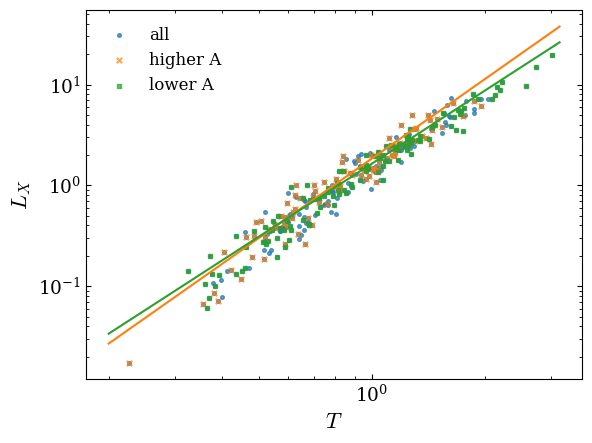

In [37]:
all_logX_ = cf.logX_(samples[cf.COLUMNS['T']][:313], 'LX-T')
p_dipoles_logX_ = cf.logX_(p_dipoles[cf.COLUMNS['T']], 'LX-T')
n_dipoles_logX_ = cf.logX_(n_dipoles[cf.COLUMNS['T']], 'LX-T')
all_logY_ = cf.logY_(samples[cf.COLUMNS['LX']][:313], samples['ObservedRedshift'][:313] ,'LX-T')
p_dipoles_logY_ = cf.logY_(p_dipoles[cf.COLUMNS['LX']], p_dipoles['ObservedRedshift'], 'LX-T')
n_dipoles_logY_ = cf.logY_(n_dipoles[cf.COLUMNS['LX']], n_dipoles['ObservedRedshift'], 'LX-T')

inverse_weight = np.cos(np.deg2rad(dtheta[:313][dtheta[:313] < 75]))


plt.scatter(10**all_logX_, 10**all_logY_, alpha=0.7, s=7, label='all')
plt.scatter(10**p_dipoles_logX_, 10**p_dipoles_logY_, alpha=0.7, s=15, marker='x', label='higher A')
plt.scatter(10**n_dipoles_logX_, 10**n_dipoles_logY_, alpha=0.7, s=7, marker='s', label='lower A')

# plt.errorbar(10**p_dipoles_logX_, 10**p_dipoles_logY_, yerr=inverse_weight*0.09, fmt='.')

logT_ = np.linspace(-0.7, 0.5, 100)
logLX_ = np.log10(scan_bf['A'][1861]) + scan_bf['B'][1861] * logT_
plt.plot(10**logT_, 10**logLX_, color='tab:orange')

logLX_2 = np.log10(scan_bf['A'][5879]) + scan_bf['B'][5879] * logT_
plt.plot(10**logT_, 10**logLX_2, color='tab:green')

plt.ylabel(r'$L_X$')
plt.xlabel(r'$T$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [14]:
scan_bt = pd.read_csv('./data/fits/legacy/scan_btstrp_LX-T_θ75.csv')
p_dipole_bt = scan_bt.loc[(scan_bt['Glon'] == -100) & (scan_bt['Glat'] == 32)]
n_dipole_bt = scan_bt.loc[(scan_bt['Glon'] == 80) & (scan_bt['Glat'] == -32)]

In [15]:
all_bt = pd.read_csv('./data/fits/legacy/bootstrap_LX-T.csv')

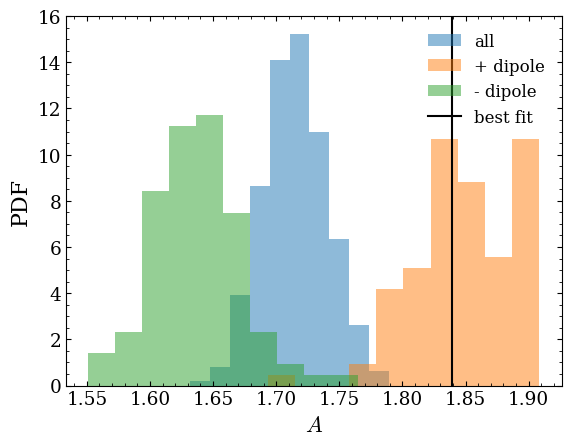

In [16]:
plt.hist(all_bt['A'], alpha=0.5, bins=10, label='all', density=True)
plt.hist(p_dipole_bt['A'], alpha=0.5, bins=10, label='+ dipole', density=True)
plt.hist(n_dipole_bt['A'], alpha=0.5, bins=10, label='- dipole', density=True)

plt.axvline(scan_bf['A'][1861], color='k', label='best fit')
plt.xlabel('$A$')
plt.ylabel('PDF')
plt.legend()
plt.show()

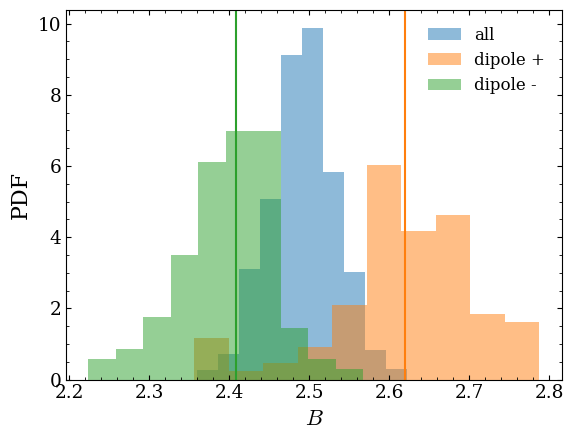

In [36]:
plt.hist(all_bt['B'], alpha=0.5, bins=10, label='all', density=True)
plt.hist(p_dipole_bt['B'], alpha=0.5, bins=10, label='dipole +', density=True)
plt.hist(n_dipole_bt['B'], alpha=0.5, bins=10, label='dipole -', density=True)

plt.axvline(scan_bf['B'][1861], color='tab:orange')
plt.axvline(scan_bf['B'][5879], color='tab:green')
plt.xlabel('$B$')
plt.ylabel('PDF')
plt.legend()
plt.show()